In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/natural-gas-usage/data.csv
/kaggle/input/renewable-energy-world-wide-19652022/06 hydro-share-energy.csv
/kaggle/input/renewable-energy-world-wide-19652022/03 modern-renewable-prod.csv
/kaggle/input/renewable-energy-world-wide-19652022/04 share-electricity-renewables.csv
/kaggle/input/renewable-energy-world-wide-19652022/16 biofuel-production.csv
/kaggle/input/renewable-energy-world-wide-19652022/11 share-electricity-wind.csv
/kaggle/input/renewable-energy-world-wide-19652022/15 share-electricity-solar.csv
/kaggle/input/renewable-energy-world-wide-19652022/09 cumulative-installed-wind-energy-capacity-gigawatts.csv
/kaggle/input/renewable-energy-world-wide-19652022/13 installed-solar-PV-capacity.csv
/kaggle/input/renewable-energy-world-wide-19652022/10 wind-share-energy.csv
/kaggle/input/renewable-energy-world-wide-19652022/02 modern-renewable-energy-consumption.csv
/kaggle/input/renewable-energy-world-wide-19652022/01 renewable-share-energy.csv
/kaggle/input/renewable-ener

In [3]:
import pandas as pd # tabular data maniulation
import numpy as np # numeric
import datetime as dt


# Data Vis 
import matplotlib.pyplot as plt # low lvl plotting (plots, bar, histo) trends overtime
import matplotlib.cm as cm
import seaborn as sns # high lvl plotting (heatmaps, KDE, box) relationships
import plotly.express as px# interactive vis (geospatical)
import plotly.io as pio
import folium # specifically for geospatical maps
import squarify  # Treemap library


# ML & Moddeling
import sklearn as stl # core ML lib(linear Regr, Decision Trees, R Forest, Clustering)
from xgboost import XGBRegressor  # Best for time-series and structured data
import statsmodels as sms # time series analysis (ARIMA,SARIMA) analsye prod over time.
from sklearn.model_selection import train_test_split # For training
from sklearn.metrics import mean_squared_error, r2_score # Loss
from sklearn.linear_model import LinearRegression # Model
from sklearn.preprocessing import PolynomialFeatures


# Time-Series & DL
import prophet as pht # Time series 
import torch as t # LSTMS for Time series

# Geospatial & PowerBI
from geopy.geocoders import Nominatim
import geopandas as gpd # geospatial ac#ross locs
import shapely as sly # mapping wind farms, infastructure 

# Ignore Warnings.
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [9]:
df_1 = pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/08 wind-generation.csv")
df_2 = pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/09 cumulative-installed-wind-energy-capacity-gigawatts.csv")
df_3 = pd.read_csv("/kaggle/input/renewable-energy-world-wide-19652022/10 wind-share-energy.csv")

In [10]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8676 entries, 0 to 8675
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Entity                       8676 non-null   object 
 1   Code                         7217 non-null   object 
 2   Year                         8676 non-null   int64  
 3   Electricity from wind (TWh)  8676 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 271.3+ KB


In [11]:
df_1.describe()

,Year,Electricity from wind (TWh)
count,8676.000000,8676.000000
mean,2000.344168,14.571142
std,15.507389,86.388161
min,1965.000000,0.000000
25%,1990.000000,0.000000
50%,2004.000000,0.000000
75%,2013.000000,0.059000
max,2022.000000,1848.260000


In [12]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entity         1540 non-null   object 
 1   Code           1143 non-null   object 
 2   Year           1540 non-null   int64  
 3   Wind Capacity  1540 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 48.3+ KB


In [13]:
print(df_2.isnull().sum())
df_2.describe()

Entity             0
Code             397
Year               0
Wind Capacity      0
dtype: int64


,Year,Wind Capacity
count,1540.000000,1540.000000
mean,2009.068182,19.822411
std,7.187177,63.736134
min,1995.000000,0.000000
25%,2003.000000,0.082000
50%,2009.000000,0.941650
75%,2015.000000,6.096985
max,2021.000000,824.874060


In [15]:
df_3.info()
print(df_3.isnull().sum())
df_3.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5445 entries, 0 to 5444
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Entity                              5445 non-null   object 
 1   Code                                4230 non-null   object 
 2   Year                                5445 non-null   int64  
 3   Wind (% equivalent primary energy)  5445 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 170.3+ KB
Entity                                   0
Code                                  1215
Year                                     0
Wind (% equivalent primary energy)       0
dtype: int64


,Year,Wind (% equivalent primary energy)
count,5445.000000,5445.000000
mean,1994.368595,0.440741
std,16.180258,1.533420
min,1965.000000,0.000000
25%,1981.000000,0.000000
50%,1995.000000,0.000000
75%,2008.000000,0.052514
max,2021.000000,24.614344


In [18]:
# Replace missing values with a filler 
df_1["Code"] = df_1["Code"].fillna("Unknown")
df_2["Code"] = df_2["Code"].fillna("Unknown")
df_3["Code"] = df_3["Code"].fillna("Unknown")

In [20]:
wind_gen = set(df_1["Entity"].unique())
cumulative_wind = set(df_2["Entity"].unique())
wind_share = set(df_3["Entity"].unique())

In [21]:
common_countires = wind_gen & cumulative_wind & wind_share
print(common_countires)

{'Canada', 'Ireland', 'Brazil', 'Spain', 'Iran', 'Taiwan', 'China', 'Denmark', 'Turkey', 'Romania', 'Europe', 'United Kingdom', 'High-income countries', 'Oceania', 'Egypt', 'Middle East (BP)', 'Sweden', 'South Korea', 'Netherlands', 'Asia', 'Africa (BP)', 'Thailand', 'Germany', 'Ukraine', 'New Zealand', 'Asia Pacific (BP)', 'Australia', 'North America (BP)', 'Norway', 'Poland', 'South and Central America (BP)', 'Argentina', 'Portugal', 'Upper-middle-income countries', 'Austria', 'Mexico', 'Italy', 'North America', 'Philippines', 'South Africa', 'India', 'Japan', 'Finland', 'World', 'Europe (BP)', 'Belgium', 'United States', 'South America', 'Africa', 'Greece', 'CIS (BP)', 'Russia', 'Pakistan', 'Chile', 'France', 'Morocco', 'Lower-middle-income countries', 'Bulgaria'}


In [22]:
def filter_data(df, year=None, countries=None, unit=None):
    filtered_df = df.copy()
    if year:
        filtered_df = filtered_df[filtered_df["Year"].isin([year] if isinstance(year, int) else year)]
    
    if countries:
        filtered_df = filtered_df[filtered_df["Entity"].isin([countries] if isinstance(countries, str) else countries)]
    
    if unit:
        filtered_df = filtered_df[filtered_df["Unit"].isin([unit] if isinstance(unit, str) else unit)]
    
    return filtered_df


# Function to generate a list of years
def generate_years(minyr, maxyr):
    return list(range(minyr, maxyr + 1))


# Set of all independent countries
def fill_ind_countries():
    countries = {country.name for country in pycountry.countries}
    return countries


# find yearly average of unit type
def avg_per_year_df(df, years, unit_type):
    data = []
    for year in years:
        filtered = df.loc[
            (df["Entity"].isin(fill_ind_countries())) &
            (df["Year"] == year)
        ]
        avg = round(filtered[unit_type].mean(), 3)
        data.append({"Year": year, "Average_Share": avg})
    
    return pd.DataFrame(data)

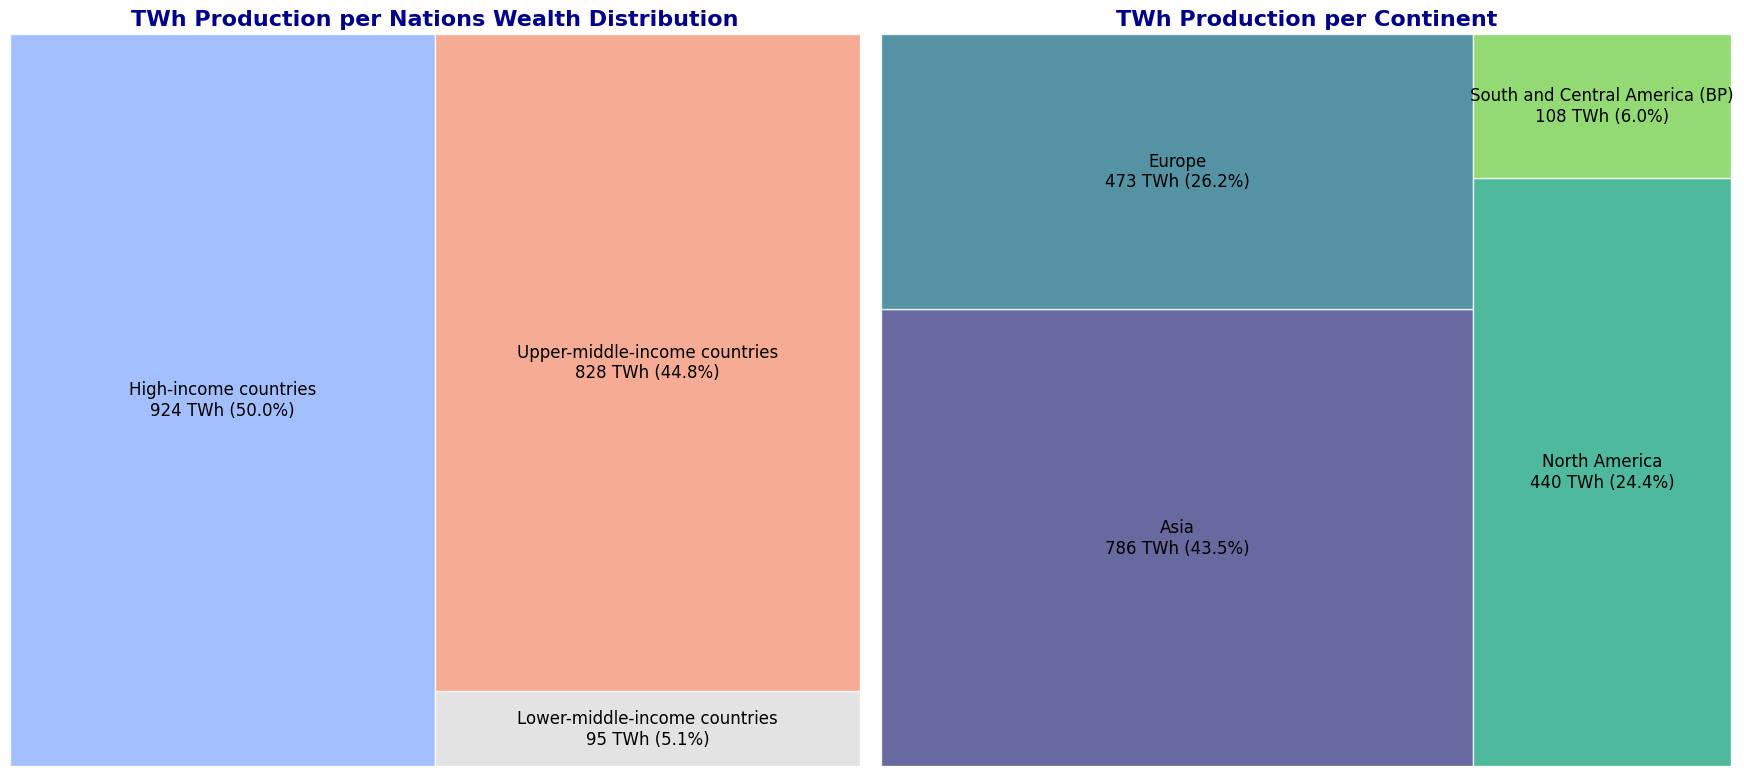

In [23]:
income_data = ["High-income countries", "Upper-middle-income countries","Lower-middle-income countries","Low-income countries"]
# Key Continent Data 
continent_data = ["North America" , "Africa" ,"Asia" , "Central America (BP)", "Europe", 
            "South and Central America (BP)", "Oceania", "Middle East (BP)"]

# Filter data by income and continent with minimum threshold
income_filtered = filter_data(df_08, year=2021, countries=income_data)
income_filtered = income_filtered[income_filtered["Electricity from wind (TWh)"] > 50]

continent_filtered = filter_data(df_08, year=2021, countries=continent_data)
continent_filtered = continent_filtered[continent_filtered["Electricity from wind (TWh)"] >50]

# total
total_income = income_filtered["Electricity from wind (TWh)"].sum()
total_continent = continent_filtered["Electricity from wind (TWh)"].sum()

# list comp with % share and TWh
labels_income = [
    f"{row['Entity']}\n{row['Electricity from wind (TWh)']:.0f} TWh ({(row['Electricity from wind (TWh)'] / total_income * 100):.1f}%)"
    for _, row in income_filtered.iterrows()]

labels_continent = [
    f"{row['Entity']}\n{row['Electricity from wind (TWh)']:.0f} TWh ({(row['Electricity from wind (TWh)'] / total_continent * 100):.1f}%)"
    for _, row in continent_filtered.iterrows()]

# Sizes
sizes_income = income_filtered["Electricity from wind (TWh)"]
sizes_continent = continent_filtered["Electricity from wind (TWh)"]

# Plot
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Income Treemap
axes[0].set_title("TWh Production per Nations Wealth Distribution", fontsize=16, fontweight="bold", color="darkblue")
squarify.plot(
    sizes=sizes_income, 
    label=labels_income, 
    alpha=0.8, 
    color=sns.color_palette("coolwarm", len(sizes_income)),
    ax=axes[0], 
    text_kwargs={'fontsize': 12, 'color': 'black'}
)
axes[0].axis("off")

# Continent Treemap
axes[1].set_title("TWh Production per Continent", fontsize=16, fontweight="bold", color="darkblue")
squarify.plot(
    sizes=sizes_continent, 
    label=labels_continent, 
    alpha=0.8, 
    color=sns.color_palette("viridis", len(sizes_continent)),
    ax=axes[1], 
    text_kwargs={'fontsize': 12, 'color': 'black'}
)
axes[1].axis("off")

plt.tight_layout()
plt.show()

<Figure size 1800x1200 with 0 Axes>

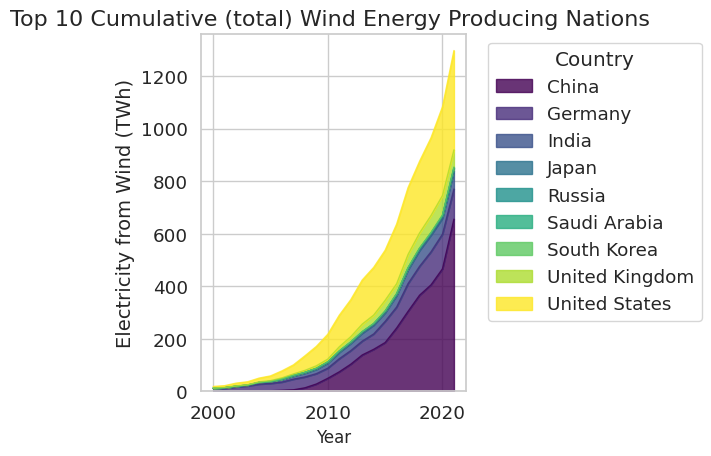

In [24]:
key_counts = ["United Kingdom", "Germany","Japan","South Korea","India","Saudi Arabia","Russia", "United States", "China"]

# Filter data 
key_df = filter_data(df_08, year=generate_years(2000, 2021), countries=key_counts)

# pivot data
pivot_df = key_df.pivot(index="Year", columns="Entity", values="Electricity from wind (TWh)")

# Plot
plt.figure(figsize=(18, 12))
pivot_df.plot.area(colormap="viridis", linewidth=1, alpha=0.8)

plt.title("Top 10 Cumulative (total) Wind Energy Producing Nations ", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Electricity from Wind (TWh)", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()

In [27]:
pip install pycountry


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 72.0 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [28]:
import pycountry


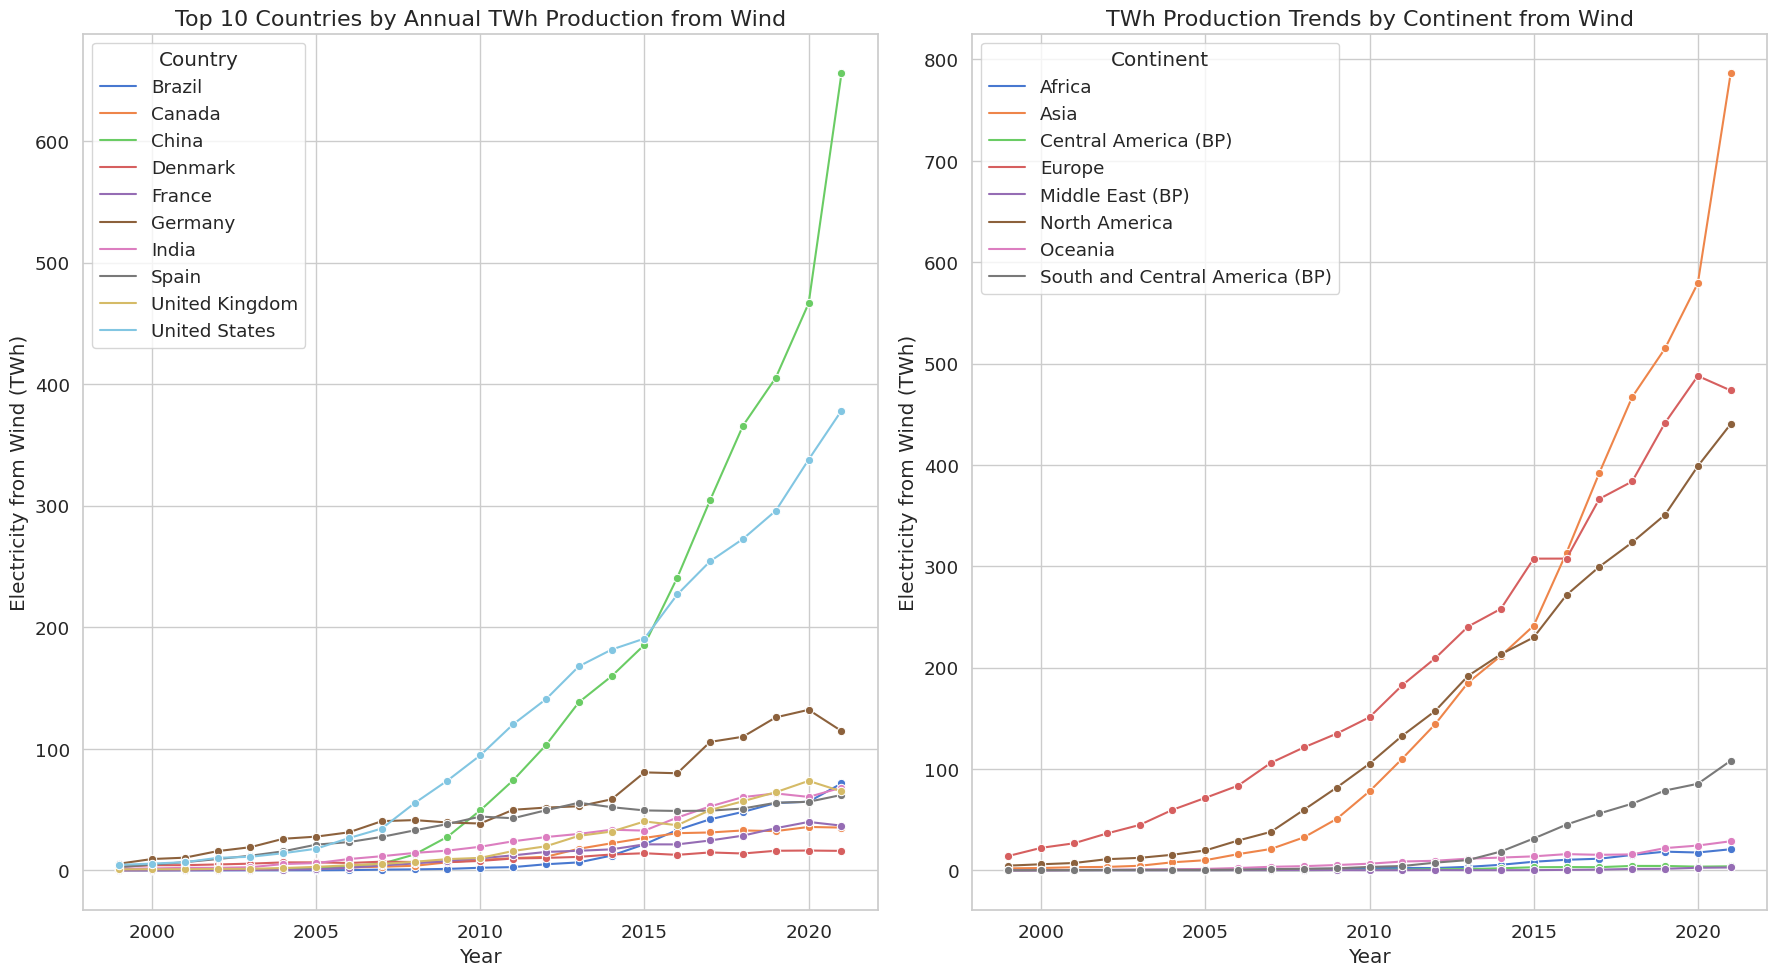

In [30]:
continental_data_filtered = filter_data(df_01, generate_years(1999, 2021), continent_data)

# Filter country data 
countries_data_filtered = filter_data(df_01, generate_years(1999, 2021), fill_ind_countries())

# Get top 10 countries 
top_countries = (countries_data_filtered.groupby("Entity")["Electricity from wind (TWh)"]
                 .sum().sort_values(ascending=False).index.tolist()
                )

top_10_data = countries_data_filtered[countries_data_filtered["Entity"].isin(top_countries[:10])]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))

# Plot
sns.lineplot(data=top_10_data, x="Year", y="Electricity from wind (TWh)", hue="Entity", ax=axes[0], marker="o")
axes[0].set_title('Top 10 Countries by Annual TWh Production from Wind', fontsize=16)
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Electricity from Wind (TWh)')
axes[0].legend(title='Country')

# Plot 2
sns.lineplot(data=continental_data_filtered, x="Year", y="Electricity from wind (TWh)", hue="Entity", ax=axes[1], marker="o")
axes[1].set_title('TWh Production Trends by Continent from Wind', fontsize=16)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Electricity from Wind (TWh)')
axes[1].legend(title='Continent')

plt.tight_layout()
plt.show()

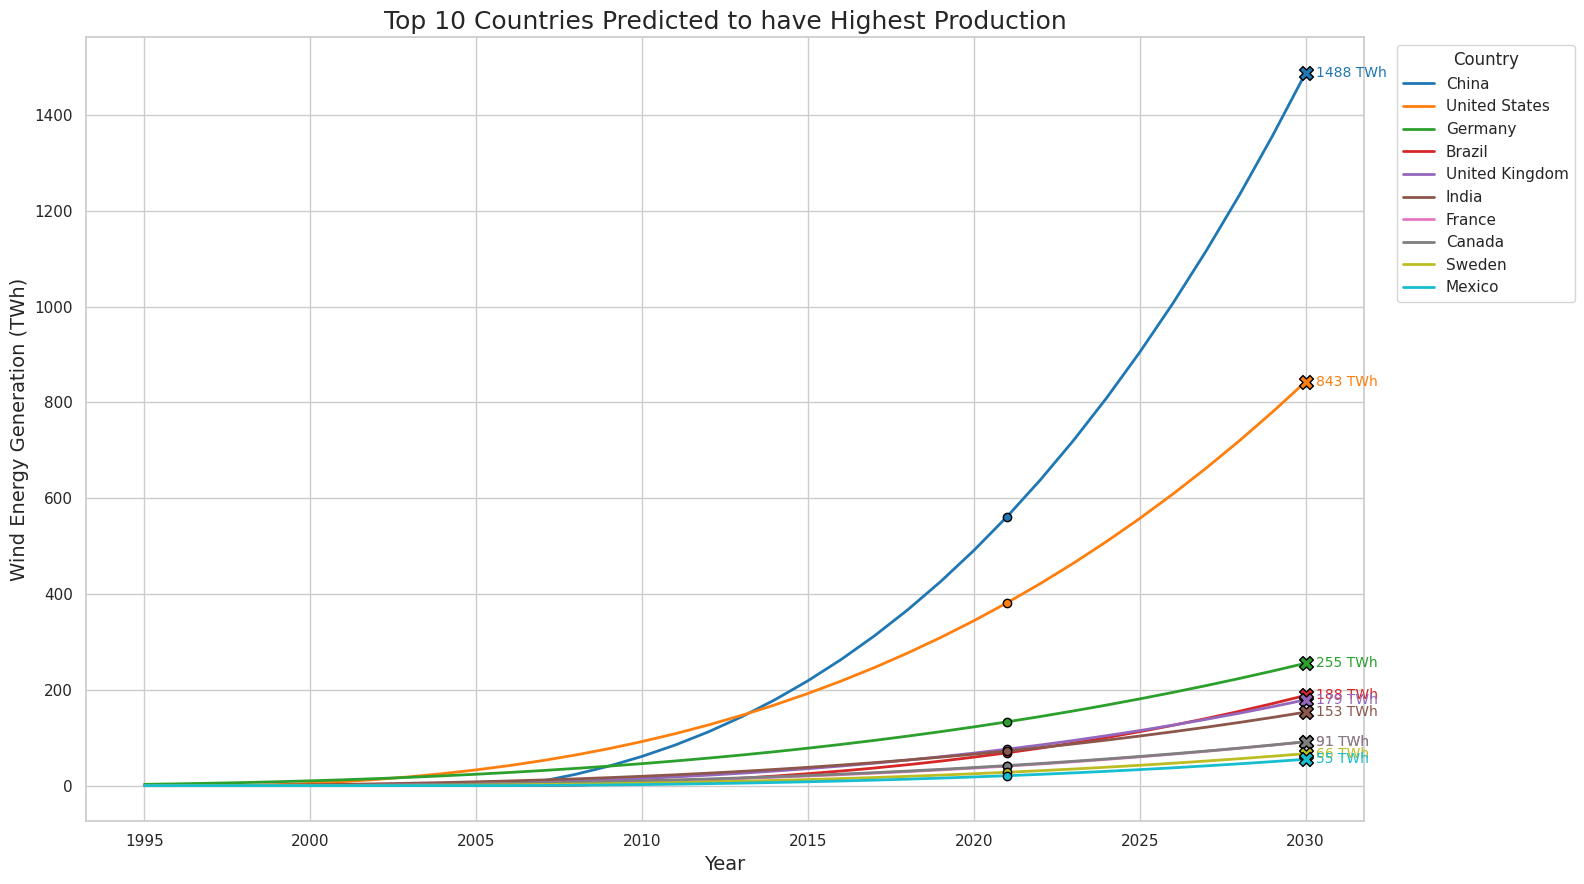

In [33]:
# Filter the Data
filtered_df = df_08[
    (df_01["Entity"].isin(top_countries)) & 
    (df_01["Year"].between(1980, 2021))
].dropna(subset=["Electricity from wind (TWh)"])

# Cubic Degree 
projected_growth = []
poly = PolynomialFeatures(degree=3)

for country, group in filtered_df.groupby("Entity"):
    if len(group["Year"].unique()) < 10:
        continue

    X = group["Year"].values.reshape(-1, 1)
    y = group["Electricity from wind (TWh)"].values

    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)

    pred_2021 = model.predict(poly.transform([[2021]]))[0]
    pred_2030 = model.predict(poly.transform([[2030]]))[0]
    growth = pred_2030 - pred_2021

    projected_growth.append({
        "Country": country,
        "2021": pred_2021,
        "2030": pred_2030,
        "Growth": growth
    })

# Top 10 by Growth
growth_df = pd.DataFrame(projected_growth)
top_10_df = growth_df.sort_values("Growth", ascending=False).head(10)
top_countries = top_10_df["Country"].tolist()

# Plot
all_years = np.arange(1995, 2031).reshape(-1, 1)
all_years_poly = poly.transform(all_years)
palette = sns.color_palette("tab10", n_colors=10)

plt.figure(figsize=(16, 9))
sns.set(style="whitegrid")

for i, country in enumerate(top_countries):
    group = filtered_df[filtered_df["Entity"] == country]
    X = group["Year"].values.reshape(-1, 1)
    y = group["Electricity from wind (TWh)"].values

    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)

    predicted_y = model.predict(all_years_poly)
    predicted_y = np.clip(predicted_y, 0, None)  # Clamp negative values to 0

    color = palette[i % len(palette)]

    plt.plot(all_years.flatten(), predicted_y, label=country, color=color, linewidth=2)
    plt.scatter(2021, model.predict(poly.transform([[2021]]))[0], color=color, edgecolor="black", zorder=5)
    plt.scatter(2030, model.predict(poly.transform([[2030]]))[0], color=color, marker="X", s=100, edgecolor="black", zorder=5)
    plt.text(2030 + 0.3, model.predict(poly.transform([[2030]]))[0], f"{int(model.predict(poly.transform([[2030]]))[0])} TWh", color=color, fontsize=10, va='center')

plt.title("Top 10 Countries Predicted to have Highest Production", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Wind Energy Generation (TWh)", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


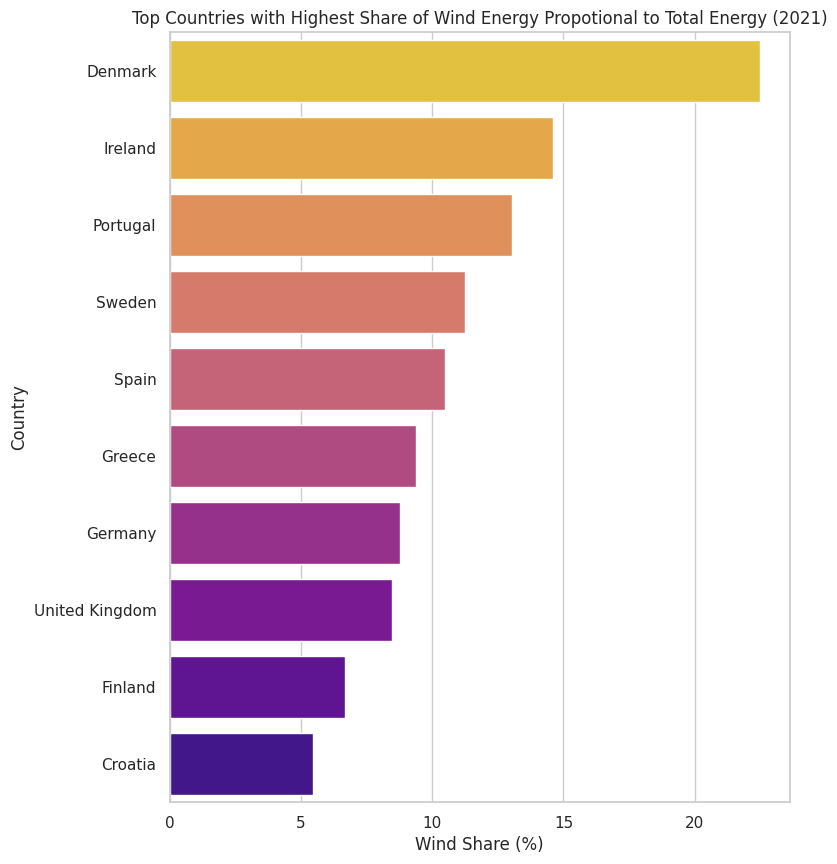

In [34]:
countries_10 = df_03[(df_10["Year"] == 2021) & (df_10["Entity"].isin(fill_ind_countries()))]

top_10_countries = countries_10.sort_values("Wind (% equivalent primary energy)", ascending=False).head(10)

# Plot
plt.figure(figsize=(8, 10))
sns.barplot(y=top_10_countries["Entity"], x=top_10_countries["Wind (% equivalent primary energy)"], palette="plasma_r")

plt.title("Top Countries with Highest Share of Wind Energy Propotional to Total Energy (2021)")
plt.xlabel("Wind Share (%)")
plt.ylabel("Country")
plt.show()

In [35]:
pio.renderers.default = 'iframe_connected'

avg_per_year_df(df_10, generate_years(1990, 2021),"Wind (% equivalent primary energy)")

# Your inputs
years = generate_years(1990, 2021)
unit_type = "Wind (% equivalent primary energy)"

# Calculate average per year using your function
avg_df = avg_per_year_df(df_10, years, unit_type)

# Merge this average back into the main dataframe
filtered_df = df_10[df_10["Entity"].isin(fill_ind_countries())].copy()
df_filtered = filtered_df[filtered_df["Year"].isin(years)]

# Merge average per year to compare countries to global avg
df_filtered = df_filtered.merge(avg_df, on="Year")

# Categorize above/below average
df_filtered["Category"] = df_filtered.apply(
    lambda row: "Above Average" if row[unit_type] > row["Average_Share"] else "Below Average",
    axis=1
)

# Interactive animated scatter plot
fig = px.scatter(
    df_filtered,
    x="Entity",
    y=unit_type,
    color="Category",
    animation_frame="Year",
    animation_group="Entity",
    hover_name="Entity",
    color_discrete_map={
        "Above Average": "green",
        "Below Average": "red"
    },
    labels={unit_type: "Wind Energy Share (%)"},
    title="Who’s Riding the Wind? Global Wind Share by Yearly Average (1990–2021)",
    height=800,
    width=1600
)

# Add horizontal average line per frame
for frame in fig.frames:
    year = int(frame.name)
    avg = avg_df.loc[avg_df['Year'] == year, 'Average_Share'].values[0]
    frame.data += (
        px.line(
            x=df_filtered["Entity"].unique(),
            y=[avg] * len(df_filtered["Entity"].unique())
        ).data
    )

# slider + buttons
fig.update_layout(
    updatemenus=[{
        "buttons": [
            {
                "label": "Play",
                "method": "animate",
                "args": [None, {"frame": {"duration": 1000, "redraw": True}, "fromcurrent": True}]
            },
            {
                "label": "Pause",
                "method": "animate",
                "args": [[None], {"mode": "immediate", "frame": {"duration": 0}, "transition": {"duration": 0}}]
            }
        ],
        "direction": "left",
        "pad": {"r": 10, "t": 87},
        "showactive": False,
        "type": "buttons",
        "x": 0.1,
        "xanchor": "right",
        "y": 0,
        "yanchor": "top"
    }],
    sliders=[{
        "steps": [
            {
                "args": [[str(year)], {"frame": {"duration": 500, "redraw": True}, "mode": "immediate"}],
                "label": str(year),
                "method": "animate"
            } for year in sorted(df_filtered["Year"].unique())
        ],
        "transition": {"duration": 300},
        "x": 0.1,
        "len": 0.9,
        "xanchor": "left",
        "y": -0.2,
        "yanchor": "top"
    }],
    xaxis_title="Country",
    yaxis_title="Wind Energy Share (%)",
    xaxis_tickangle=-45,
    plot_bgcolor='rgba(240, 248, 255, 1)',
)

fig.show(renderer='iframe')

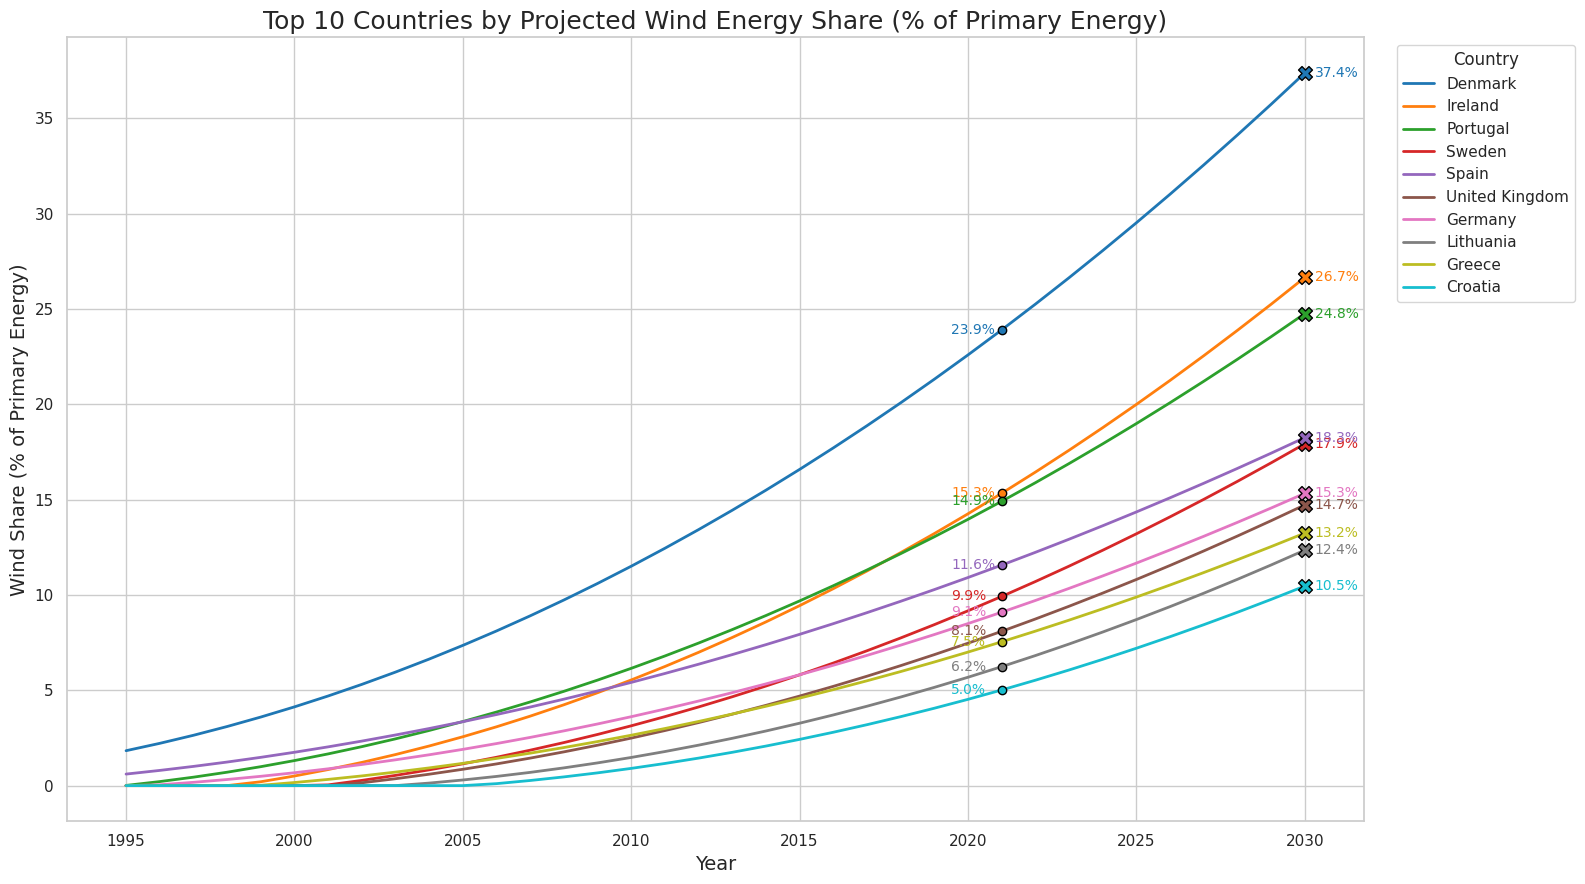

In [36]:
filtered_df = df_10[
    (df_10["Entity"].isin(fill_ind_countries())) & 
    (df_10["Year"].between(1980, 2021))
].dropna(subset=["Wind (% equivalent primary energy)"])

# prediction with quadratic 
projected_growth = []
poly = PolynomialFeatures(degree=2)

for country, group in filtered_df.groupby("Entity"):
    if len(group["Year"].unique()) < 10:
        continue

    X = group["Year"].values.reshape(-1, 1)
    y = group["Wind (% equivalent primary energy)"].values

    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)

    pred_2021 = model.predict(poly.transform([[2021]]))[0]
    pred_2030 = model.predict(poly.transform([[2030]]))[0]
    growth = pred_2030 - pred_2021

    projected_growth.append({
        "Country": country,
        "2021": pred_2021,
        "2030": pred_2030,
        "Growth": growth
    })

#Top 10 by Growth
growth_df = pd.DataFrame(projected_growth)
top_10_df = growth_df.sort_values("Growth", ascending=False).head(10)
top_countries = top_10_df["Country"].tolist()

# Plot
all_years = np.arange(1995, 2031).reshape(-1, 1)
all_years_poly = poly.transform(all_years)
palette = sns.color_palette("tab10", n_colors=10)

plt.figure(figsize=(16, 9))
sns.set(style="whitegrid")

for i, country in enumerate(top_countries):
    group = filtered_df[filtered_df["Entity"] == country]
    X = group["Year"].values.reshape(-1, 1)
    y = group["Wind (% equivalent primary energy)"].values

    X_poly = poly.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)

    predicted_y = model.predict(all_years_poly)
    predicted_y = np.clip(predicted_y, 0, 100)  # Clamp negative and over-100 values

    color = palette[i % len(palette)]

    #  prediction line
    plt.plot(all_years.flatten(), predicted_y, label=country, color=color, linewidth=2)

    pred_2021 = model.predict(poly.transform([[2021]]))[0]
    pred_2030 = model.predict(poly.transform([[2030]]))[0]

    plt.scatter(2021, pred_2021, color=color, edgecolor="black", zorder=5)
    plt.scatter(2030, pred_2030, color=color, marker="X", s=100, edgecolor="black", zorder=5)

    plt.text(2021 - 1.5, pred_2021, f"{pred_2021:.1f}%", color=color, fontsize=10, va='center')
    plt.text(2030 + 0.3, pred_2030, f"{pred_2030:.1f}%", color=color, fontsize=10, va='center')

plt.title("Top 10 Countries by Projected Wind Energy Share (% of Primary Energy)", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Wind Share (% of Primary Energy)", fontsize=14)
plt.legend(title="Country", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.grid(True)
plt.show()


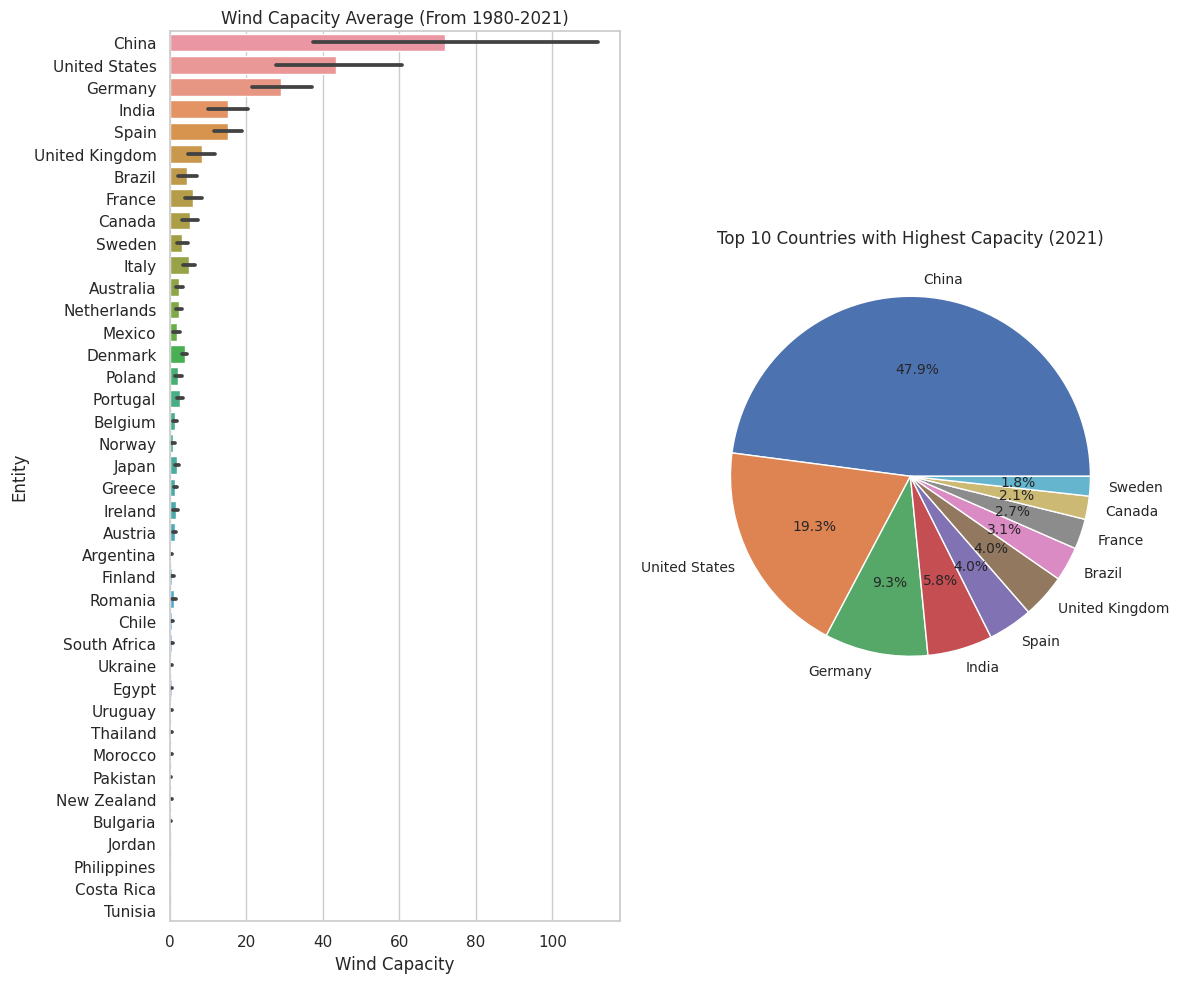

In [37]:
countries_plot = filter_data(df_02, year=generate_years(1980, 2021), countries=fill_ind_countries()).sort_values(by="Wind Capacity", ascending=False)

countries_pie = filter_data(df_02, year=2021, countries=fill_ind_countries())
pie_10 = countries_pie.nlargest(10, 'Wind Capacity')


fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,10))

sns.barplot(y="Entity", x="Wind Capacity", data=countries_plot, orient="h", ax=axes[0])
axes[0].set_title("Wind Capacity Average (From 1980-2021)")

axes[1].pie(pie_10["Wind Capacity"], labels=pie_10["Entity"], autopct='%1.1f%%', textprops={'fontsize':10})
axes[1].set_title("Top 10 Countries with Highest Capacity (2021)")

plt.tight_layout()
plt.show()

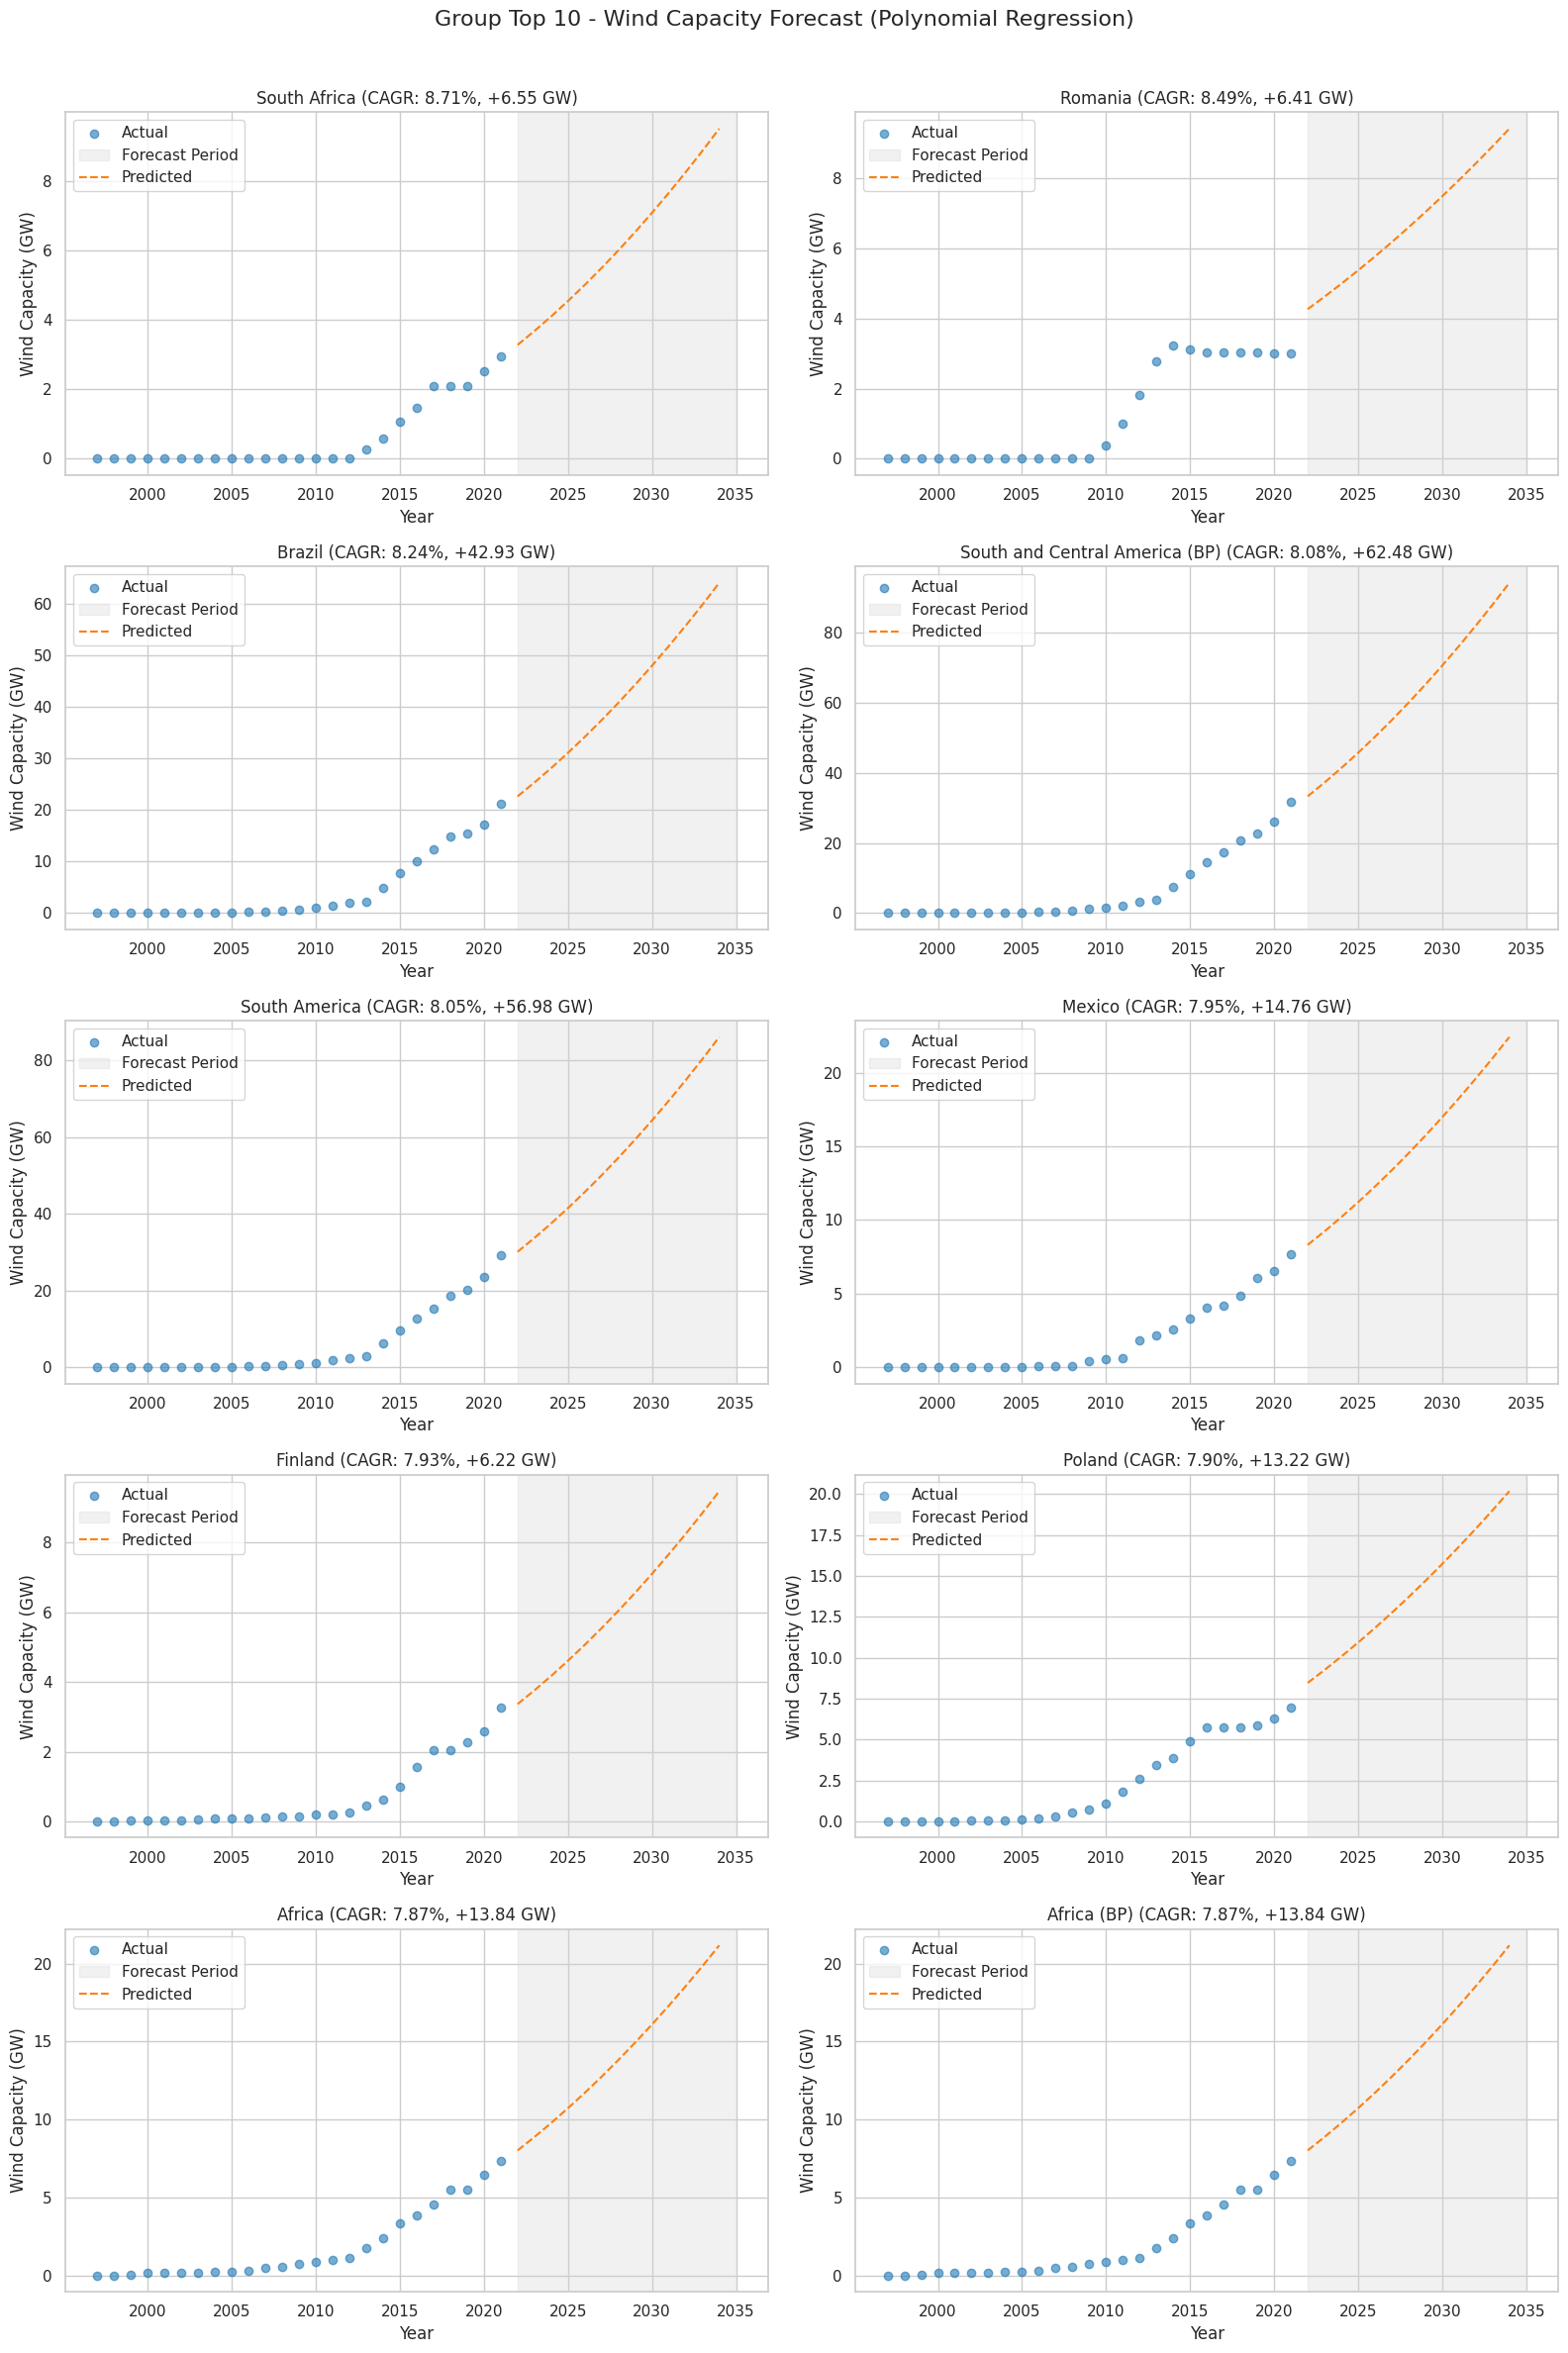

In [39]:
#Split countries into groups
def split_countries(countries, num_groups=4):
    return [countries[i::num_groups] for i in range(num_groups)]


# Train model for each country
def train_polynomial_model(country_list, year_col, capacity_col, future_years, degree=2):
    results = {}
    for country in country_list:
        df_country = df_09[df_09["Entity"] == country]
        X = df_country[[year_col]].values
        y = df_country[capacity_col].values

        if len(X) < 4:
            continue  # skip if too little data

        poly = PolynomialFeatures(degree=degree)
        X_poly = poly.fit_transform(X)

        model = LinearRegression()
        model.fit(X_poly, y)

        future_poly = poly.transform(future_years)
        predictions = model.predict(future_poly)

        results[country] = {
            "X Feature": X,
            "Y Label": y,
            "Future Years": future_years,
            "Future Predictions": predictions,
            "Future Predictions Line": predictions
        }

    return results


# Get top countries for CAGR
def get_top_n_growth(results, n=10, min_capacity_threshold=1.0, min_abs_growth=5.0):
    growth_data = []

    for country, data in results.items():
        years = data["X Feature"].flatten()
        capacities = data["Y Label"]
        sorted_indices = np.argsort(years)

        latest_capacity = capacities[sorted_indices[-1]]
        predicted_2035 = data["Future Predictions"][-1]
        year_latest = int(years[sorted_indices[-1]])

        if latest_capacity > 0 and not np.isnan(predicted_2035):
            years_diff = 2035 - year_latest
            cagr = ((predicted_2035 / latest_capacity) ** (1 / years_diff)) - 1
            abs_growth = predicted_2035 - latest_capacity

            if abs_growth >= min_abs_growth:
                growth_data.append({
                    "Country": country,
                    "CAGR": cagr,
                    "Abs Growth (GW)": abs_growth,
                    "Start GW": latest_capacity,
                    "End GW": predicted_2035,
                    "Low Base": latest_capacity < min_capacity_threshold
                })

    sorted_growth = sorted(growth_data, key=lambda x: x["CAGR"], reverse=True)
    return sorted_growth[:n]


# Plotts
def plot_predictions(results, top_growth_data, group_number="Top 10"):
    countries = [entry["Country"] for entry in top_growth_data]
    num_countries = len(countries)
    cols = 2
    rows = (num_countries + 1) // cols

    fig, axs = plt.subplots(rows, cols, figsize=(16, 5 * rows), squeeze=False)
    fig.suptitle(f"Group {group_number} - Wind Capacity Forecast (Polynomial Regression)", fontsize=16)

    for idx, country_data in enumerate(top_growth_data):
        country = country_data["Country"]
        ax = axs[idx // cols][idx % cols]
        data = results[country]

        # Actual data
        ax.scatter(data["X Feature"], data["Y Label"], label="Actual", color="tab:blue", alpha=0.6)
        ax.axvspan(2022, 2035, color='lightgray', alpha=0.3, label="Forecast Period")

        # Prediction line
        ax.plot(data["Future Years"], data["Future Predictions Line"], linestyle="--", color="tab:orange", label="Predicted")

        # Title with CAGR and growth
        growth_pct = country_data["CAGR"] * 100
        abs_growth = country_data["Abs Growth (GW)"]
        base_flag = " ⚠️" if country_data["Low Base"] else ""
        ax.set_title(f"{country} (CAGR: {growth_pct:.2f}%, +{abs_growth:.2f} GW){base_flag}")

        ax.set_xlabel("Year")
        ax.set_ylabel("Wind Capacity (GW)")
        ax.legend()
        ax.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

# pipeline
countries_plot = list(df_09["Entity"].unique())
groups = split_countries(countries_plot, num_groups=4)
future_years = np.array(range(2022, 2035)).reshape(-1, 1)

results = {}
for group in groups:
    group_results = train_polynomial_model(group, "Year", "Wind Capacity", future_years, degree=2)
    results.update(group_results)

top_10_growth = get_top_n_growth(results, n=10)
plot_predictions(results, top_10_growth)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
FILE_PATH = "/kaggle/input/natural-gas-usage/data.csv"
df = pd.read_csv(FILE_PATH)

In [41]:
df.head()

,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2014,1,SFL,FLORIDA,EPG0,Natural Gas,VCS,Commercial Consumption,N3020FL2,Natural Gas Deliveries to Commercial Consumers...,6605.0,MMCF
1,2014,1,SNH,USA-NH,EPG0,Natural Gas,VCS,Commercial Consumption,N3020NH2,Natural Gas Deliveries to Commercial Consumers...,1691.0,MMCF
2,2014,1,SOR,USA-OR,EPG0,Natural Gas,VCS,Commercial Consumption,N3020OR2,Natural Gas Deliveries to Commercial Consumers...,4711.0,MMCF
3,2014,1,SDE,USA-DE,EPG0,Natural Gas,VCS,Commercial Consumption,N3020DE2,Natural Gas Deliveries to Commercial Consumers...,2128.0,MMCF
4,2014,1,SAZ,USA-AZ,EPG0,Natural Gas,VCS,Commercial Consumption,N3020AZ2,Natural Gas Deliveries to Commercial Consumers...,3915.0,MMCF


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37994 entries, 0 to 37993
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                37994 non-null  int64  
 1   month               37994 non-null  int64  
 2   duoarea             37994 non-null  object 
 3   area-name           37994 non-null  object 
 4   product             37994 non-null  object 
 5   product-name        37994 non-null  object 
 6   process             37994 non-null  object 
 7   process-name        37994 non-null  object 
 8   series              37994 non-null  object 
 9   series-description  37994 non-null  object 
 10  value               37518 non-null  float64
 11  units               37994 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 3.5+ MB


In [43]:
df.tail()

,year,month,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
37989,2024,1,SMN,MINNESOTA,EPG0,Natural Gas,VRS,Residential Consumption,N3010MN2,Minnesota Natural Gas Residential Consumption ...,24866.0,MMCF
37990,2024,1,SNE,USA-NE,EPG0,Natural Gas,VRS,Residential Consumption,N3010NE2,Nebraska Natural Gas Residential Consumption (...,7800.0,MMCF
37991,2024,1,SVA,USA-VA,EPG0,Natural Gas,VRS,Residential Consumption,N3010VA2,Virginia Natural Gas Residential Consumption (...,15938.0,MMCF
37992,2024,1,SCT,USA-CT,EPG0,Natural Gas,VRS,Residential Consumption,N3010CT2,Connecticut Natural Gas Residential Consumptio...,9299.0,MMCF
37993,2024,1,SMA,MASSACHUSETTS,EPG0,Natural Gas,VRS,Residential Consumption,N3010MA2,Massachusetts Natural Gas Residential Consumpt...,20557.0,MMCF
